Experiment:-WAP to train and evaluate a Recurrent Neural Network using PyTorch Library to
predict the next value in a sample time series dataset

Model description:-
What is an RNN?
  RNN stands for Recurrent Neural Network — it's a type of neural network designed to handle sequential data, such as:

  •Time series (e.g. stock prices, sensor data)

  •Text (e.g. natural language)

  •Audio (e.g. speech recognition)

  The key idea is that RNNs have memory — they can "remember" information from previous inputs in a sequence, which makes them perfect for tasks where the order of data matters.

📦 Components of the Model
  1. input_size=1
  Because each time step has one feature (the sine wave value).
  
  2. hidden_size=50
  Each RNN cell has 50 hidden units, which control the model's capacity to remember patterns.
  
  3. num_layers=1
  A single-layer RNN is used. You can stack more layers for more complexity.
  
  4. self.rnn
  The core RNN layer processes sequences of shape (batch, seq_length, input_size) and returns hidden states over all time steps.
  
  5. self.fc
  A fully connected layer maps the last hidden state to a scalar output (the predicted next value in the sequence).



Epoch [10/100], Loss: 0.0328
Epoch [20/100], Loss: 0.0079
Epoch [30/100], Loss: 0.0015
Epoch [40/100], Loss: 0.0009
Epoch [50/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000

Test Loss: 0.0000


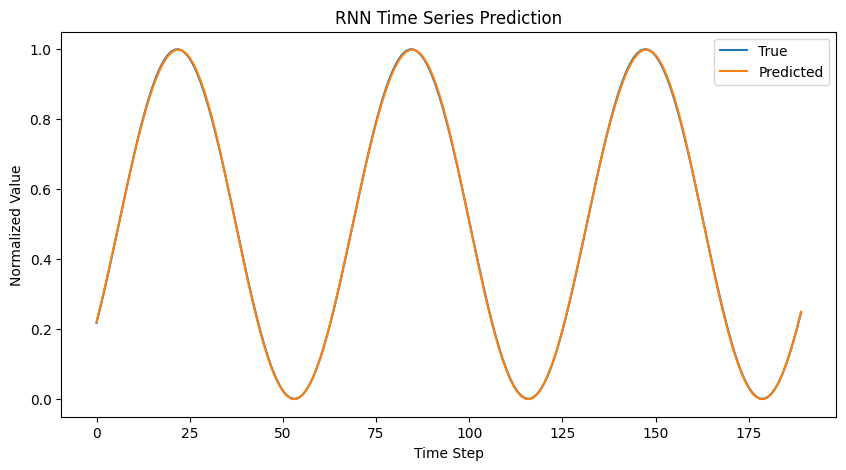

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate a sine wave time series dataset
def generate_data(seq_length=50, total_points=1000):
    x = np.linspace(0, 100, total_points)
    data = np.sin(x)
    return data

# Prepare the dataset into sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define the RNN model
class RNNPredictor(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, output_size=1):
        super(RNNPredictor, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # take output of last time step
        out = self.fc(out)
        return out

# Hyperparameters
SEQ_LENGTH = 50
EPOCHS = 100
LR = 0.01

# Load and preprocess data
data = generate_data()
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data.reshape(-1, 1)).flatten()

x, y = create_sequences(data_normalized, SEQ_LENGTH)
x = torch.tensor(x, dtype=torch.float32).unsqueeze(-1)  # shape (batch, seq_len, 1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # shape (batch, 1)

# Split into train/test
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Model, loss, optimizer
model = RNNPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    output = model(x_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    pred = model(x_test)
    test_loss = criterion(pred, y_test)
    print(f"\nTest Loss: {test_loss.item():.4f}")

# Plot predictions
pred_np = pred.numpy()
y_test_np = y_test.numpy()

plt.figure(figsize=(10, 5))
plt.plot(y_test_np, label='True')
plt.plot(pred_np, label='Predicted')
plt.legend()
plt.title("RNN Time Series Prediction")
plt.xlabel("Time Step")
plt.ylabel("Normalized Value")
plt.show()